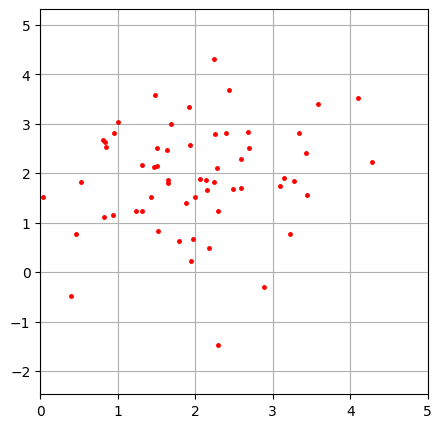

In [1]:
using PyPlot, Random

Random.seed!(0)

x = 2 .+ randn(2, 60)

figure(figsize=(5,5))
plot(x[1,1:end],x[2,1:end],"r.", markersize=5)
axis([0,5,minimum(x)-1,maximum(x)+1])
grid("on")



In [2]:
using SCS, JuMP, ECOS

m = Model(with_optimizer(SCS.Optimizer))

@variable(m, r)
@variable(m, c1)
@variable(m, c2)
#obtener la menor área que contenga todos los puntos equivale a obtener el menor radio r, donde c1 y c2 son las
#coordenadas del centro

#@constraint(m, norm(y - A*u) <= t)
#@constraint(m, [t; y - A*u] in SecondOrderCone())
@constraint(m, [r; (x[1,1:60] - ones(60).*c1) + (x[2,1:60] - ones(60).*c2)] in SecondOrderCone())
@objective(m, Min, r)

optimize!(m)

r_value = JuMP.value(r)
c1_value = JuMP.value(c1)
c2_value = JuMP.value(c2)

println("r = ", sqrt(r_value))
println("c1 = ", c1_value)
println("c2 = ", c2_value)



r = 3.423959445543377
c1 = 1.9444156788876414
c2 = 1.9444156788876414
----------------------------------------------------------------------------
	SCS v2.0.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2017
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 121, CG tol ~ 1/iter^(2.00)
eps = 1.00e-05, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 20, rho_x = 1.00e-03
Variables n = 3, constraints m = 61
Cones:	soc vars: 61, soc blks: 1
Setup time: 8.39e-05s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 7.59e-01  1.22e+00  9.81e-01 -1.02e+01  4.04e+01  1.93e-14  5.28e-05 
    20| 6.76e-11  5.30e-10  4.99e-11  1.17e+01  1.17e+01  5.32e-15  2.23e-04 
-------------------

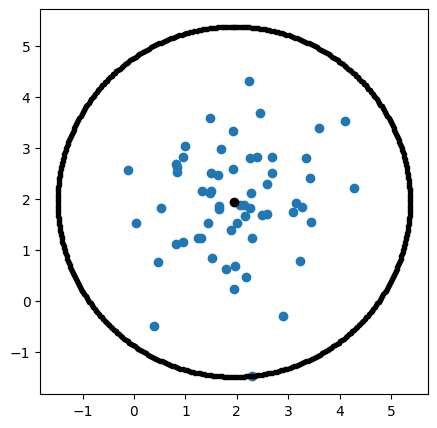

In [3]:
using PyPlot
rr = sqrt(r_value)
theta = LinRange(0,2*pi,500)
xx = c1_value .+ rr*sin.(theta)
yy = c2_value .+ rr*cos.(theta)

figure(figsize=(5, 5))
plot(x[1,1:end], x[2,1:end], "o", c1_value, c2_value, "ko", xx, yy, "k.-");
